**At the edge**
<br>
<br>
The Filter window falls off the edge of the image.
<br>
Need to extrapolate the image.
<br>
<br>
1. BORDER_REPLICATE
2. BORDER_REFLECT
3. BORDER_REFLECT_101
4. BORDER_WRAP
5. BORDER_CONSTANT


**Sharpening**
<br>
<br>
Original - Smoothed(Low Pass Image) = High Pass Image(Edges)
<br>
Original + alpha(Original-Smoothed) = Sharpened Original Image

**Box Filter vs Gaussian Filter**
<br>
<br>
Box Filtering - Box filtering, also known as average filtering, involves replacing each pixel in the image with the average value of its neighboring pixels within a specified window (kernel) size.
<br>
               Simple, Suitable for general smoothing, can cause blocky edges and is not as effective at preserving edges.
<br>
<br>
Gaussian Filtering - Gaussian filtering applies a Gaussian function to the image, which weights pixels based on their distance from the center of the kernel. The closer a pixel is to the center of the kernel, the more influence it has on the new pixel value.
<br>
<br>
*Kernal for gaussian filtering*
<br>
$$
G(x, y) = \frac{1}{2 \pi \sigma^2} e^{-\frac{x^2 + y^2}{2\sigma^2}}
$$

<br>
<br>
            More computationally complex
            The degree of smoothing can be controlled by adjusting the standard deviation 𝜎.
            produces a smoother result that preserves edges

<br>
<br>
<table>
  <tr>
    <th>Aspect</th>
    <th>Box Filtering</th>
    <th>Gaussian Filtering</th>
  </tr>
  <tr>
    <td>Kernel</td>
    <td>Uniform values (equal weights)</td>
    <td>Gaussian function (distance-based weights)</td>
  </tr>
  <tr>
    <td>Computation</td>
    <td>Simple, less computationally intensive</td>
    <td>More complex, computationally intensive</td>
  </tr>
  <tr>
    <td>Edge Preservation</td>
    <td>Poor, can cause blocky edges</td>
    <td>Better, maintains edges more effectively</td>
  </tr>
  <tr>
    <td>Smoothing Effect</td>
    <td>Uniform smoothing</td>
    <td>Distance-based smoothing, smoother results</td>
  </tr>
  <tr>
    <td>Control Parameters</td>
    <td>Kernel size</td>
    <td>Kernel size and standard deviation &sigma;</td>
  </tr>
</table>



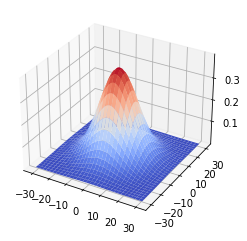

In [1]:
import numpy as np
import matplotlib.pyplot as plt

sigma = 10 #sigma is the standard deviation of the Gaussian distribution.
hw = 3*sigma +1 #hw (half-width) is set to 3×𝜎+1. This determines the range of x and y values to consider for the Gaussian function, ensuring the kernel captures enough of the distribution.

# np.linspace(start, stop, num) creates an array of evenly spaced values.
# x and y are arrays ranging from -hw to hw with 2*hw + 1 points each.
x = np.linspace(-hw, hw, 2*hw+1)
y = np.linspace(-hw, hw, 2*hw+1)

# np.meshgrid(x, y) creates two 2D arrays (grids) from the 1D arrays x and y.
# X contains the x-coordinates and Y contains the y-coordinates for the grid.
X, Y = np.meshgrid(x, y)
# print(X)
# print(Y)

# This computes the 2D Gaussian function values on the grid defined by X and Y

G = 1/np.sqrt(2*np.pi) * np.exp(-(X**2 + Y**2)/(2*sigma**2))

fig = plt.figure() # fig = plt.figure() creates a new figure.
ax = fig.add_subplot(111, projection='3d') # ax = fig.add_subplot(111, projection='3d') adds a 3D subplot to the figure.
ax.plot_surface(X, Y, G, cmap='coolwarm') # ax.plot_surface(X, Y, G, cmap='coolwarm') plots the surface defined by X, Y, and G using a colormap coolwarm.
plt.show()



**Seperability of the Gaussian Filter**
<br>
<br>
The 2D Gaussian can be expressed as the product of two functions, one a function of X and the other a function of Y.
<br>
In this case, the two Gaussian are the (identical) 1-D Gaussians.
<br>
Seperability means that a 2-D convolution can be reduced to two 1-D convolutions(one among rows and one among columns).
<br>
What is the complexity of filtering an *n* * *n* image with an *m* * *m* kernal?
<br>
$$O(n^{2}m^{2})$$
<br>


What is the comlexity if the kernal is seperable?
<br>
$$O(n^{2}m)$$



$$ n^{2}m + n^{2}m $$

<br>
Computational cost is reduced


In [2]:
#1-D Gaussian of length 5 with sigma = 1

sigma = 1
hw = 2
x = np.linspace(-hw, hw, 2*hw+1)


g = 1/np.sqrt((2*np.pi)) * np.exp(-(x**2 )/(2*sigma**2))

g

array([0.05399097, 0.24197072, 0.39894228, 0.24197072, 0.05399097])

In [3]:
#Outer product between two 1-D Gaussians
G = np.outer (g,g)

G

array([[0.00291502, 0.01306423, 0.02153928, 0.01306423, 0.00291502],
       [0.01306423, 0.05854983, 0.09653235, 0.05854983, 0.01306423],
       [0.02153928, 0.09653235, 0.15915494, 0.09653235, 0.02153928],
       [0.01306423, 0.05854983, 0.09653235, 0.05854983, 0.01306423],
       [0.00291502, 0.01306423, 0.02153928, 0.01306423, 0.00291502]])

In [4]:
#3x3 Sobel Kernal
sobel_x = np.array([[-1, 0, 1], 
                    [-2, 0, 2],
                    [-1, 0, 1]])

print(sobel_x)

b = np.array([-1, 0, 1])
a = np.array([1, 2, 1])
sobel_x = np.outer(a, b)

print(sobel_x)


[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


**Sobel Filter**

The Sobel filter is used in image processing, particularly in edge detection. It works by calculating the gradient of the image intensity at each pixel within the image. The Sobel filter highlights regions of high spatial frequency that correspond to edges.

There are two Sobel kernels, one for detecting horizontal edges (sobel_x) and one for detecting vertical edges (sobel_y).

**steps**

* Convolution
* Gradient Magnitude
* Edge Direction



In [7]:
# Example for sobel

# This image has a simple pattern with a central square of zeros surrounded by threes.
image = np.array([[3, 3, 3, 3, 3],
                  [3, 0, 0, 0, 3],
                  [3, 0, 3, 0, 3],
                  [3, 0, 0, 0, 3],
                  [3, 3, 3, 3, 3]])

from scipy.ndimage import convolve

sobel_x = np.array([[-1, 0, 1], 
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[ 1,  2,  1],
                    [ 0,  0,  0],
                    [-1, -2, -1]])

# Convolve the image with the Sobel kernels
G_x = convolve(image, sobel_x)
G_y = convolve(image, sobel_y)

# Compute the gradient magnitude
G = np.sqrt(G_x**2 + G_y**2)

print("Gradient in x direction:\n", G_x) # Gradient in x direction (G_x):Shows the response to the horizontal Sobel kernel, highlighting vertical edges.
print("Gradient in y direction:\n", G_y) # Gradient in y direction (G_y):Shows the response to the vertical Sobel kernel, highlighting horizontal edges.
print("Gradient magnitude:\n", G) # Gradient Magnitude (G):Combines both gradients to give the overall edge strength at each pixel.





Gradient in x direction:
 [[  3   3   0  -3  -3]
 [  9   6   0  -6  -9]
 [ 12   6   0  -6 -12]
 [  9   6   0  -6  -9]
 [  3   3   0  -3  -3]]
Gradient in y direction:
 [[ -3  -9 -12  -9  -3]
 [ -3  -6  -6  -6  -3]
 [  0   0   0   0   0]
 [  3   6   6   6   3]
 [  3   9  12   9   3]]
Gradient magnitude:
 [[ 4.24264069  9.48683298 12.          9.48683298  4.24264069]
 [ 9.48683298  8.48528137  6.          8.48528137  9.48683298]
 [12.          6.          0.          6.         12.        ]
 [ 9.48683298  8.48528137  6.          8.48528137  9.48683298]
 [ 4.24264069  9.48683298 12.          9.48683298  4.24264069]]


$$ Edges, Corners, Blobs $$

**Edge Detection**
<br>
<br>
Goal : Identify sudden changes (discontinuities) in an image.
<br>
* Intuitively, most semantic and shape information from the image can be encoded in the edges.
<br>
* More campact than pixels.


**Image Gradiant**
<br>
<br>
$$
\nabla I = \left( \frac{\partial I}{\partial x}, \frac{\partial I}{\partial y} \right)
$$
<br>
In a constant intensity area grafiant is zero.

In [5]:
G /= np.sum(G)

**The Canny Edge Detector**
<br>
<br>
1. Filter image with derivative of gaussian
<br>
2. Find magnitude and orientation of gradiant
<br>
3. Non-maximum suppression
<br>
* Thin wide "ridges" down to single pixel width
<br>
4. Linking and thresholding (hysteresis):
<br>
* Define two thresholds: low and High.
* Use the high threshold to start edge curves and the low threshold to continue them.

* A multi-stage algorithm that provides good and reliable edge detection.

Steps include:

* Smoothing the image with a Gaussian filter to reduce noise.
* Finding the intensity gradient of the image.
* Applying non-maximum suppression to get thin edges.
* Using double thresholding to determine potential edges.
* Tracking edges by hysteresis to finalize edge detection.

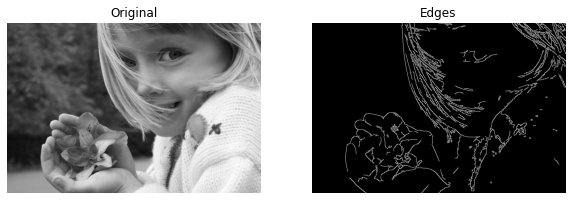

In [14]:
#Code for Canny
#Canny Edge

import cv2 as cv
import matplotlib.pyplot as plt

im = cv.imread('D:\semester 5\EN3160\images\girl.jpg', cv.IMREAD_GRAYSCALE)
assert im is not None


# cv.Canny(image, threshold1, threshold2) applies the Canny edge detector to the image.
#threshold1 and threshold2 are the lower and upper thresholds for the hysteresis procedure.
edges = cv.Canny(im, 100, 200)

fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].imshow(im, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(edges, cmap='gray')
ax[1].set_title('Edges')
ax[1].axis('off')
plt.show()


# Canny Edge Detector

The Canny edge detector is a multi-step algorithm used to detect a wide range of edges in images.it aims to identify edges with a low error rate and accurately locate edge points. 

The algorithm consists of the following steps:

* Noise Reduction:

The first step is to reduce noise in the image using a Gaussian filter. This helps to smooth the image and remove unnecessary details and noise.


* Gradient Calculation:

Compute the gradient intensity and direction of the image using Sobel filters. This helps in finding the intensity and direction of edges.

The gradients Gx and Gy are calculated using convolution with Sobel kernels.

* Non-Maximum Suppression:

Thin out the edges by suppressing non-maximum pixels. This means that for each pixel, the algorithm checks if it is a local maximum in the direction of the gradient.
<br>
This step helps in retaining only the strongest edges while discarding weaker and irrelevant edges.


* Double Thresholding:

Apply double thresholding to determine potential edges. Pixels with gradient values above the high threshold are considered strong edges, and those below the low threshold are discarded. Pixels with gradient values between the two thresholds are considered weak edges and may be connected to strong edges.

* Edge Tracking by Hysteresis:

Finally, track edges by hysteresis. Strong edges are marked as edges, and weak edges are marked as edges only if they are connected to strong edges. This step helps in refining the edge detection by removing false edges.

# Example of Canny Edge Detector Code

Here is the code for applying the Canny edge detector:

```python
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read the image
im = cv.imread('path_to_image.jpg', cv.IMREAD_GRAYSCALE)

# Step 1: Noise Reduction
blurred = cv.GaussianBlur(im, (5, 5), 1.4)

# Step 2: Gradient Calculation
Gx = cv.Sobel(blurred, cv.CV_64F, 1, 0, ksize=3)
Gy = cv.Sobel(blurred, cv.CV_64F, 0, 1, ksize=3)
gradient_magnitude = np.sqrt(Gx**2 + Gy**2)
gradient_direction = np.arctan2(Gy, Gx)

# Step 4: Double Thresholding
edges = np.zeros_like(gradient_magnitude) # This line creates a new array called edges with the same shape as gradient_magnitude, initialized to zeros. This array will store the detected edges after processing.
high_threshold = gradient_magnitude.max() * 0.2
low_threshold = high_threshold * 0.5

# This line uses np.where to find the indices of pixels in gradient_magnitude that are greater than or equal to the high_threshold. 
# The indices are stored in strong_i and strong_j, which correspond to the row and column indices of strong edges.
strong_i, strong_j = np.where(gradient_magnitude >= high_threshold)

#This identifies indices of pixels that are below the low_threshold. These pixels will be considered as non-edges (zero values).
zeros_i, zeros_j = np.where(gradient_magnitude < low_threshold)

# This finds the indices of pixels that fall between the low and high thresholds. These are classified as weak edges.
weak_i, weak_j = np.where((gradient_magnitude >= low_threshold) & (gradient_magnitude < high_threshold))

edges[strong_i, strong_j] = 255 # For strong edges, the corresponding pixels in the edges array are set to 255 (white in grayscale).
edges[weak_i, weak_j] = 75 # For weak edges, the pixels are set to 75 (a shade of gray). This helps distinguish weak edges visually when displayed.

# Step 5: Edge Tracking by Hysteresis (simplified)
# (Implementation of hysteresis can be added here)

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(im, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')
plt.axis('off')
plt.show()



In [11]:
#canny edge detector ranga sir code

import cv2 as cv
import numpy as np
import math

# Constants and initializations
hi_threshold_max = 255  # Maximum value for high threshold
title_window = r'Canny'  # Title for the window

# Initial ratio for low threshold to high threshold
ratio = 0.3  
hi_threshold = 255  # Initial high threshold
low_threshold = math.floor(hi_threshold * ratio)  # Initial low threshold

# Function to handle trackbar events
def on_trackbar(val):
    global hi_threshold, ratio, low_threshold  # Declare variables as global to modify them

    # Read current trackbar positions
    hi_threshold = cv.getTrackbarPos(trackbar1_name, title_window)
    ratio = cv.getTrackbarPos(trackbar2_name, title_window) / 100.0

    # Calculate low threshold based on the ratio and update edges
    low_threshold = math.floor(hi_threshold * ratio)
    edges = cv.Canny(im, low_threshold, hi_threshold)
    
    # Show edges in the window
    cv.imshow(title_window, edges)

# Load the image
im = cv.imread('D:/semester 5/EN3160/images/girl.jpg', cv.IMREAD_COLOR)
if im is None:
    print('Could not open or find the image: ')
    exit(0)

# Create a named window
cv.namedWindow(title_window)

# Create trackbars for high threshold and ratio (low threshold percentage)
trackbar1_name = r'High Threshold Value'
cv.createTrackbar(trackbar1_name, title_window, hi_threshold, hi_threshold_max, on_trackbar)
trackbar2_name = r'Low Threshold %'
cv.createTrackbar(trackbar2_name, title_window, int(ratio * 100), 100, on_trackbar)

# Call the function once to initialize with default values
on_trackbar(hi_threshold)

# Wait for a key event and destroy all windows
cv.waitKey()
cv.destroyAllWindows()


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:868: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


In [12]:
# improved code

import cv2 as cv
import numpy as np
import math

# Constants
hi_threshold_max = 255  # Maximum value for high threshold
title_window = 'Canny'   # Window title for displaying the image
ratio = 0.3              # Low threshold / High threshold ratio

# Initial thresholds
hi_threshold = 255  # Initial high threshold value
low_threshold = math.floor(hi_threshold * ratio)  # Initial low threshold value

# Trackbar callback function
def on_trackbar(val):
    # Update high threshold from the trackbar
    hi_threshold = cv.getTrackbarPos(trackbar1_name, title_window)
    # Update ratio from the second trackbar
    ratio = cv.getTrackbarPos(trackbar2_name, title_window) / 100.0
    # Calculate low threshold based on the high threshold
    low_threshold = hi_threshold * ratio
    # Perform Canny edge detection with updated thresholds
    edges = cv.Canny(im, low_threshold, hi_threshold)
    # Display the edges in the window
    cv.imshow(title_window, edges)

# Read the image
im = cv.imread('D:\\semester 5\\EN3160\\images\\girl.jpg', cv.IMREAD_COLOR)
if im is None:
    print('Could not open or find the image.')
    exit(0)

# Create a window to display the image
cv.namedWindow(title_window)

# Create trackbars for high and low threshold
trackbar1_name = 'High Threshold Value'
cv.createTrackbar(trackbar1_name, title_window, hi_threshold, hi_threshold_max, on_trackbar)
trackbar2_name = 'Low Threshold %'
cv.createTrackbar(trackbar2_name, title_window, int(ratio * 100), 100, on_trackbar)

# Initialize the display with the current threshold values
on_trackbar(hi_threshold)

# Wait until a key is pressed
cv.waitKey(0)

# Destroy all OpenCV windows
cv.destroyAllWindows()


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:868: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


**Corners**
<br>
<br>
Intensity changes in horizontal direction and vertical direction.
<br>
we should be easily recognize the point by looking through a small window
<br>
Shifting a window in any direction should give a large change in intensity
<br>
<br>
**Characteristic of Good Features**
<br>
<br>
* Repeatability - The same feature can be found in several images despite geometric and photometric transformations.
* Saliency - Each feature is distinctive
* Compactness and efficiencyc - Many fewer features than image pixels
* Locality - A feature occupies a relatively small area of the image; robust to clutter and occlusion.

**Feature points are used for**
<br>
<br>
Image alignment
<br>
3D reconstruction
<br>
Motion Tracking
<br>
Robot navigation
<br>
Indexing and database retrieval
<br>
Object recognition

**flat region** - no change in all direction
<br>
**edge** - no change along the edge direction
<br>
**corner** - significant change in all direction